<a href="https://colab.research.google.com/github/DSabarish/NPS-Analysis-with-NumPy/blob/main/NPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Libraries and Load Data**

In [ ]:
# Importing necessary libraries
import numpy as np
import requests

# Define the URL to fetch the data
url = "https://raw.githubusercontent.com/DSabarish/NPS-Analysis-with-NumPy/main/survey.txt"

# Fetching the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Link data loaded
    print("Data loaded from the provided link.")

    # Extracting the data and splitting it into lines
    data_lines = response.text.strip().split('\n')

    # Convert the data lines to integers
    data = np.array([int(score) for score in data_lines])

    # Display the top 10 data points to verify
    print("Top 10 data points:", data[:10])
else:
    print(f"Failed to retrieve data from {url}. Status code: {response.status_code}")


Data loaded from the provided link.
Top 10 data points: [ 7 10  5  9  9  4  7  9  9  9]


#**Calculation**

In [ ]:
# Calculate the total number of responses
total_responses = len(data)

# Calculate the number of promoters (score >= 9)
promoters = np.sum(data >= 9)
promoters_percentage = (promoters / total_responses) * 100

# Calculate the number of detractors (score <= 6)
detractors = np.sum(data <= 6)
detractors_percentage = (detractors / total_responses) * 100

# Calculate the number of passives (score between 7 and 8)
passives = np.sum((data >= 7) & (data <= 8))
passives_percentage = (passives / total_responses) * 100

# Calculate the Net Promoter Score (NPS)
nps = ((promoters - detractors) / total_responses) * 100

# Classify the NPS
if nps >= 75:
    classification = "Excellent"
elif 50 <= nps < 75:
    classification = "Very Good"
elif 30 <= nps < 50:
    classification = "Good"
elif 0 <= nps < 30:
    classification = "Neutral"
else:
    classification = "Poor"

#**Display NPS Stats**

In [ ]:
# Display the frequency and percentage for Promoters, Detractors, and Passives
print(f"Number of Promoters: {promoters} ({promoters_percentage:.2f}%)")
print(f"Number of Detractors: {detractors} ({detractors_percentage:.2f}%)")
print(f"Number of Passives: {passives} ({passives_percentage:.2f}%)")

# Display the NPS and its classification
print(f"\nNet Promoter Score (NPS): {nps:.2f}")
print(f"Classification: {classification}")

Number of Promoters: 609 (52.19%)
Number of Detractors: 332 (28.45%)
Number of Passives: 226 (19.37%)

Net Promoter Score (NPS): 23.74
Classification: Neutral


#**Charts**

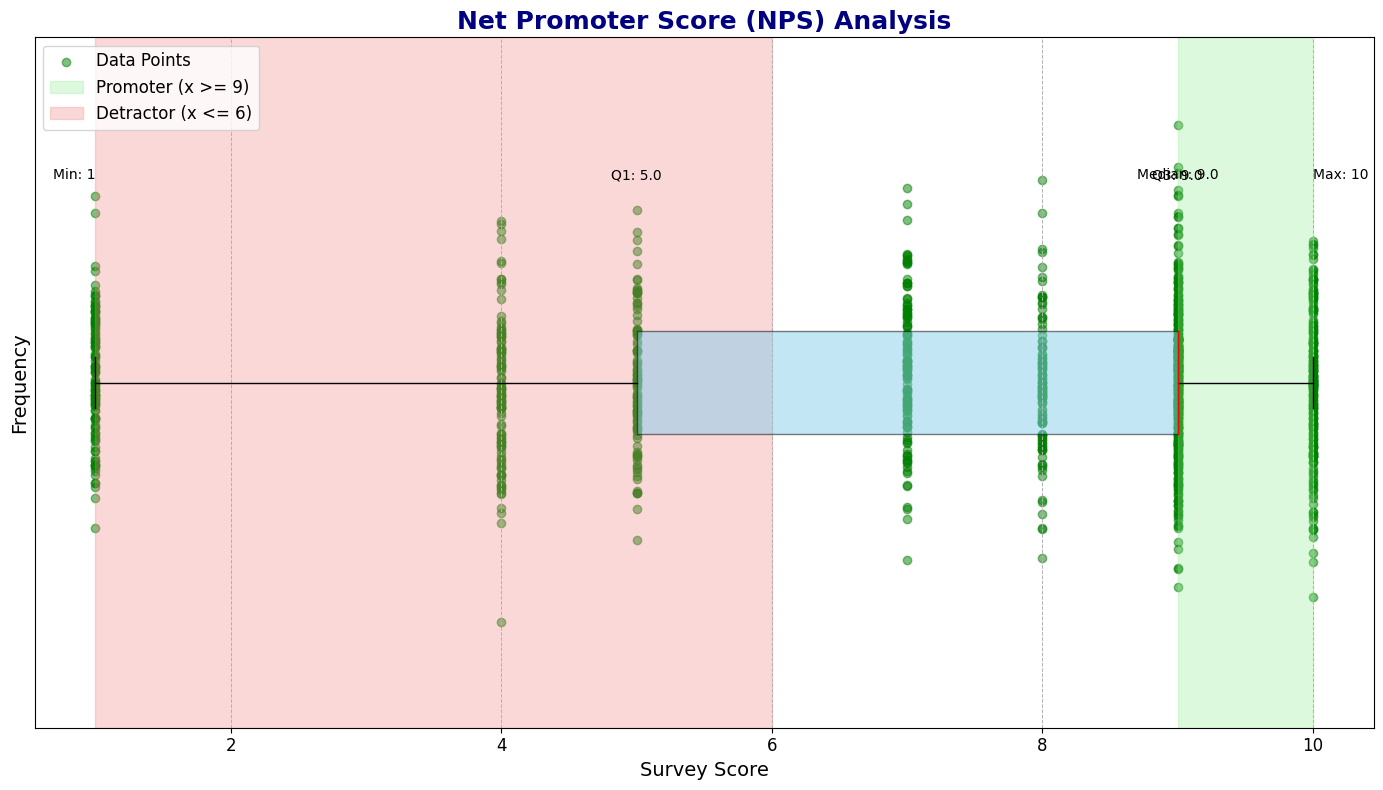

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample NPS data
# data = np.array([7, 10, 5, 9, 9, 4, 7, 9, 9, 9, 6, 8, 7, 10, 6, 9, 10, 6, 8, 7])

# Calculate quartiles, min, and max
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
data_min = np.min(data)
data_max = np.max(data)

# Set plot size
plt.figure(figsize=(14, 8))

# Create box plot
plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black', alpha=0.5),
            medianprops=dict(color='red'))

# Scatter plot with slight random noise to y-values
y = np.ones_like(data) + np.random.normal(0, 0.1, size=len(data))
plt.scatter(data, y, alpha=0.5, color='green', label='Data Points')

# Annotate quartiles, min, and max
plt.text(data_min, 1.3, f'Min: {data_min}', color='black', ha='right', va='center')
plt.text(q1, 1.3, f'Q1: {q1}', color='black', ha='center', va='center')
plt.text(q2, 1.3, f'Median: {q2}', color='black', ha='center', va='center')
plt.text(q3, 1.3, f'Q3: {q3}', color='black', ha='center', va='center')
plt.text(data_max, 1.3, f'Max: {data_max}', color='black', ha='left', va='center')

# Highlight promoter and detractor regions
plt.axvspan(9, data_max, color='lightgreen', alpha=0.3, label='Promoter (x >= 9)')
plt.axvspan(data_min, 6, color='lightcoral', alpha=0.3, label='Detractor (x <= 6)')

plt.title('Net Promoter Score (NPS) Analysis', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Survey Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([])
plt.legend(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7)

# Show plot
plt.tight_layout()
plt.show()


#**Inference**

---

### Airbnb NPS Analysis Snapshot:

🌟 **Good News**:
- **52%** of your guests are **Promoters**! They love their Airbnb experience and are enthusiastic about recommending it to friends and family.

🚨 **Areas to Watch**:
- **28%** are **Detractors**. Some guests have faced issues or had unsatisfactory stays. Addressing their concerns is vital to prevent negative reviews and ensure guest satisfaction.

😐 **Room for Growth**:
- **19%** are **Passives**. They've had average experiences and could be swayed by enhancements to their Airbnb stays. With improved offerings, they might become more engaged and satisfied guests.

### Overall NPS Insight:

📈 **Current NPS**: **23.74** - **Neutral Zone**  
While Airbnb has a strong base of happy guests, there's an opportunity to elevate the overall guest experience and satisfaction.

### Actionable Steps:

🔍 **Focus Areas**:
- Prioritize resolving issues raised by Detractors to improve the guest experience.
- Engage with Passives to understand their needs and preferences, aiming to enhance their stay and feedback.

🚀 **Growth Opportunity**:
- Leverage positive feedback from Promoters to attract more guests and drive bookings.
- Implement improvements based on guest feedback to foster loyalty and encourage repeat bookings.

### Why It Matters:

- Elevating the NPS from **Neutral** to **Good** or **Very Good** can differentiate Airbnb from competitors, attract more guests, and foster a community of satisfied and loyal users.

